In this part we will automatically label real estate as being:
- or Apartments
- or industrial premises. commercial or similar

In [ ]:
#We import the data into a dataframe

Chemin ="C:\\Users\\Python\\Modele_Prediction\\"

df_jeu_test = pd.read_excel(Chemin + "echantillon_a_classer2.xlsx")

In [ ]:
#calculate the price per square meter by dividing the land value by the surface area
df_jeu_test['prix_au_metre_carre'] = df_jeu_test.apply(
    lambda row: row['valeur_fonciere'] / row['surface_reelle'], axis=1)

#remove unnecessary columns
df_jeu_test=df_jeu_test.drop(columns=['valeur_fonciere', 'nom_commune','surface_reelle'])

We observe in the data that we have different price values per square meter for the same district (here the 19th district). It may well be that this is our dimension to use to attribute the highest prices per square meter in a department to commercial premises, and the lowest prices to apartments.

To perform this operation, we will use the Kmeans algorithm which will search for 2 centroids through the data.

In [42]:
# Importing the KMeans class from the sklearn.cluster module
from sklearn.cluster import KMeans

# Creation of an instance of the KMeans class with 2 clusters
k_means = KMeans(n_clusters=2, random_state=808, n_init='auto')  

# Training the KMeans model on X data
k_means.fit(df_jeu_test)

# Display of the centers of the clusters learned by the model
print(k_means.cluster_centers_)


from sklearn.metrics import silhouette_score
k_means_labels = k_means.predict(df_jeu_test)
print("silhouette_score: ", silhouette_score(df_jeu_test,k_means_labels ))

#The silhouette coefficient is between -1 (bad) and 1 (excellent).


[[75019.          9806.92467429]
 [75019.          7408.77502952]]
silhouette_score:  0.9086063492675848


The silhouette coefficient is a metric used to evaluate the quality of clustering results. It measures how closely each data point belongs to its assigned cluster, relative to how well it might be assigned to other clusters. It is between -1 (bad) and 1 (excellent).


In [43]:
# We check the prediction data
# Add the cluster labels to the DataFrame
df_jeu_test['cluster_label'] = k_means_labels

# Show the first rows of the DataFrame for verification
print(df_jeu_test.head())

   code_postal  prix_au_metre_carre  cluster_label
0        75019              9871.44              0
1        75019             10045.57              0
2        75019              9194.70              0
3        75019              9469.14              0
4        75019              7463.61              1


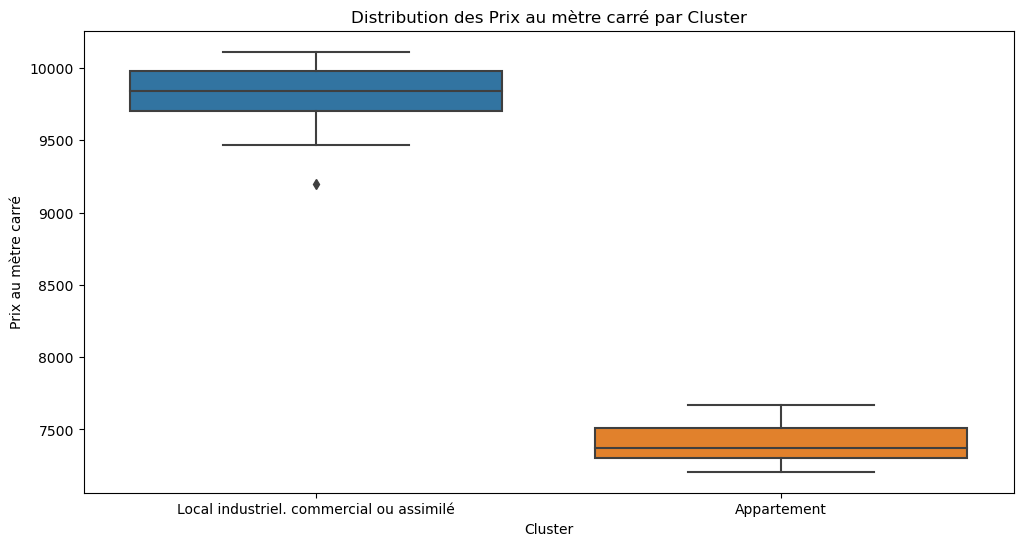

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Add the cluster labels to the DataFrame
df_jeu_test['cluster_label'] = k_means_labels

# Rename the labels in the 'cluster_label' column
df_jeu_test['cluster_label'] = df_jeu_test['cluster_label'].replace({0: 'Local industriel. commercial ou assimilé', 1: 'Appartement'})

# Create a box plot to visualize the distribution of prices per square meter by cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster_label', y='prix_au_metre_carre', data=df_jeu_test)
plt.title('Distribution des Prix au mètre carré par Cluster')
plt.xlabel('Cluster')
plt.ylabel('Prix au mètre carré')
plt.show()

We got our prediction. We can change the labels and replace the values with 0 by Industrial premises. commercial or similar and values at +1 per Apartment.

In [45]:
#We display the results
# Replace labels in 'cluster_label' column
df_jeu_test['cluster_label'] = df_jeu_test['cluster_label'].replace({0: 'Local industriel. commercial ou assimilé', 1: 'Appartement'})

# Show the first rows of the DataFrame for verification
print(df_jeu_test.head())



   code_postal  prix_au_metre_carre                             cluster_label
0        75019              9871.44  Local industriel. commercial ou assimilé
1        75019             10045.57  Local industriel. commercial ou assimilé
2        75019              9194.70  Local industriel. commercial ou assimilé
3        75019              9469.14  Local industriel. commercial ou assimilé
4        75019              7463.61                               Appartement


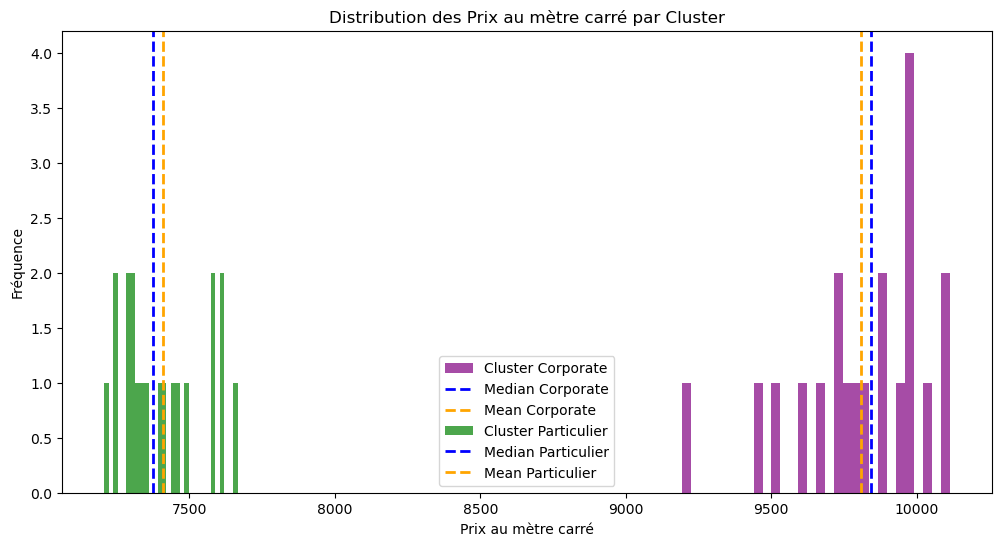

In [46]:
#Analysis and presentation of results
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Add the cluster labels to the DataFrame
df_jeu_test['cluster_label'] = k_means_labels

# Rename the labels in the 'cluster_label' column
df_jeu_test['cluster_label'] = df_jeu_test['cluster_label'].replace({0: 'Corporate', 1: 'Particulier'})

# Create a histogram to visualize the distribution of prices per square meter by cluster
plt.figure(figsize=(12, 6))

# Set histogram colors for each cluster
colors = ['purple', 'green']

# Plot histograms for each cluster
for i, cluster_label in enumerate(df_jeu_test['cluster_label'].unique()):
    cluster_data = df_jeu_test[df_jeu_test['cluster_label'] == cluster_label]['prix_au_metre_carre']
    plt.hist(cluster_data, bins=30, alpha=0.7, label=f'Cluster {cluster_label}', color=colors[i])

    # Add the line for the median
    median_value = cluster_data.median()
    plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label=f'Median {cluster_label}')

    # Add the line for the average
    mean_value = cluster_data.mean()
    plt.axvline(mean_value, color='orange', linestyle='dashed', linewidth=2, label=f'Mean {cluster_label}')

# Add a caption
plt.legend()

plt.title('Distribution des Prix au mètre carré par Cluster')
plt.xlabel('Prix au mètre carré')
plt.ylabel('Fréquence')
plt.show()

Average: The average is the sum of all values in a data set divided by the total number of values.
The average is sensitive to extreme values (outliers) because it takes each value into account.

Median: The median is the value that separates the data set into two equal parts.

The main difference lies in the sensitivity to extreme values. The median is not affected by extreme values, because it depends only on the central position of the data. In contrast, the mean is influenced by all values, including the extremes, which can result in bias if those values are significantly different from the rest of the data set.

Cluster “Apartment”
- Price values per square meter to the left of the mean and median are lower. This suggests that the majority of apartments in this cluster are priced below the average and median.
- Price values per square meter to the right of the mean and median are higher. This indicates that there are also apartments with higher prices, but they are not as common as those with lower prices.

Cluster “Industrial, commercial or similar premises”
- Price values per square meter to the left of the mean and median are lower. This suggests that a significant proportion of properties in this cluster are priced below the mean and median.
- Price values per square meter to the right of the mean and median are higher. This indicates that there are also properties with higher prices, but they are not as common as those with lower prices.




Outliers can significantly influence the positioning of centroids, as the algorithm seeks to minimize the sum of squares of the distances. Outliers can lead to biased results.